#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

1. For Numeric Data:
- Scatter plots, Histogram, Boxplot, Summary statistics, Kernel Density Estimation (KDE) plot
2. For Categorical Data: 
- Pie charts, Bar plots, Frequency counts / value counts. 
3. The relationship between categorical and numerical data. 
- While numerical data provides the values inside those groupings, categorical data defines the groups. Finding distinctions, patterns, or trends between categories can be made by examining their relationship.


2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [16]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed 
np.random.seed(42)

# Generate fake dataset
n = 1000
categories = [f"Category_{i}" for i in range(1, 11)]

df = pd.DataFrame({
    "Category": np.random.choice(categories, size=n),
    "Numeric1": np.random.normal(loc=50, scale=10, size=n),   
    "Numeric2": np.random.uniform(10, 100, size=n)          
})

df.head()


,Category,Numeric1,Numeric2
0,Category_7,58.678490,18.780626
1,Category_4,40.634860,87.578822
2,Category_8,41.244750,51.414604
3,Category_5,52.046102,77.435534
4,Category_7,43.973522,36.152880


          Numeric1     Numeric2
count  1000.000000  1000.000000
mean     50.104442    55.653538
std      10.242074    26.245516
min      14.317947    10.016956
25%      43.514205    32.854278
50%      50.273596    57.024274
75%      57.302433    78.482155
max      81.419670    99.974242


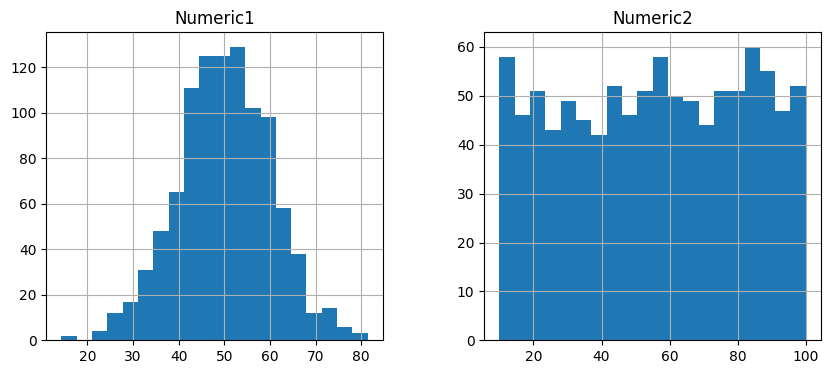

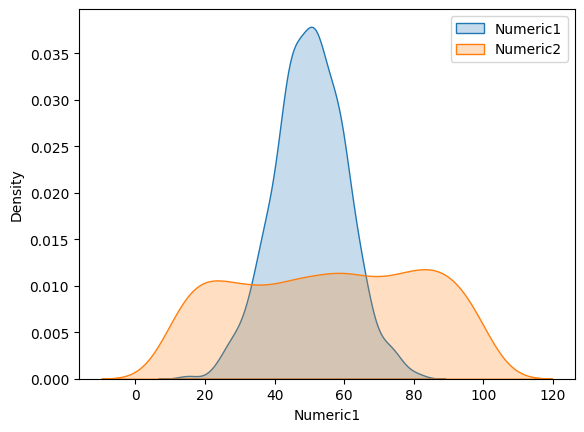

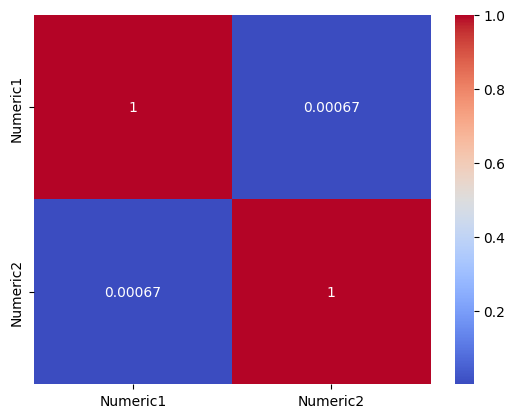

In [17]:
#Numeric data

# Summary statistics
print(df[["Numeric1", "Numeric2"]].describe())

# Histograms
df[["Numeric1", "Numeric2"]].hist(bins=20, figsize=(10, 4))
plt.show()

# KDE plots
sns.kdeplot(df["Numeric1"], fill=True, label="Numeric1")
sns.kdeplot(df["Numeric2"], fill=True, label="Numeric2")
plt.legend()
plt.show()

# Correlation heatmap
sns.heatmap(df[["Numeric1", "Numeric2"]].corr(), annot=True, cmap="coolwarm")
plt.show()


Category
Category_1     118
Category_3     110
Category_10    107
Category_5     107
Category_8     100
Category_6      96
Category_4      94
Category_7      94
Category_9      91
Category_2      83
Name: count, dtype: int64


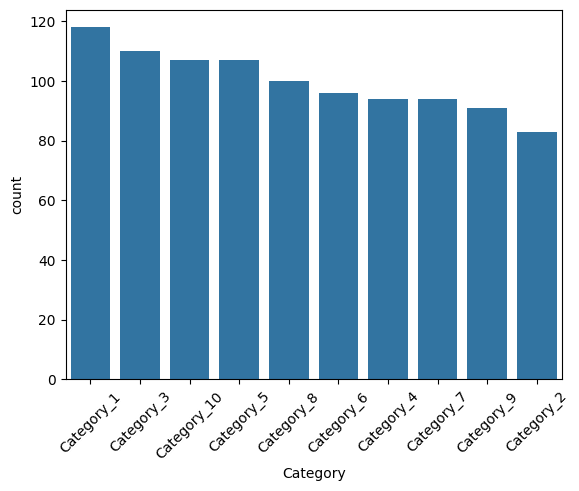

In [18]:
# Categorical Data 

# Frequency counts
print(df["Category"].value_counts())

# Count plot
sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
plt.xticks(rotation=45)
plt.show()



              Numeric1   Numeric2
Category                         
Category_1   49.770803  56.468491
Category_10  49.180681  55.943715
Category_2   52.343109  54.412330
Category_3   51.419122  55.577007
Category_4   49.869472  53.057814
Category_5   50.248253  56.359006
Category_6   50.987659  58.483983
Category_7   50.314199  54.557289
Category_8   49.133051  59.687776
Category_9   47.984883  51.045179


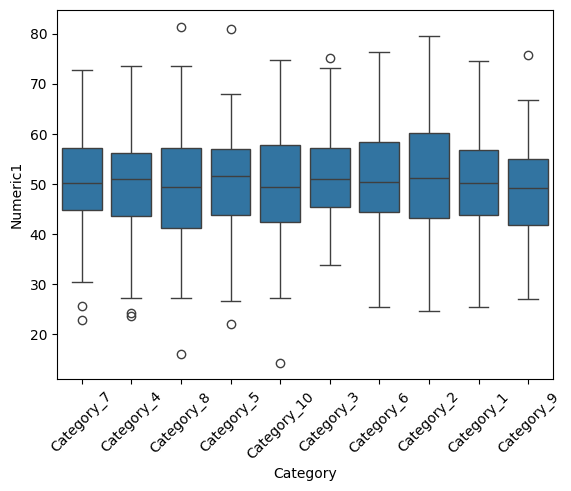

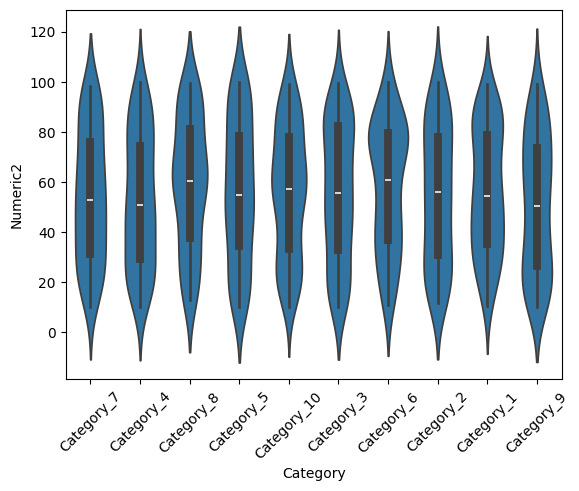

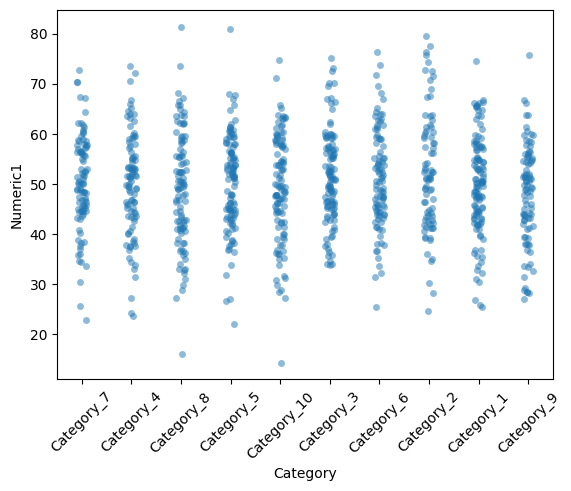

In [19]:
# Relation between them 

# Group-wise summary
print(df.groupby("Category")[["Numeric1", "Numeric2"]].mean())

# Boxplot
sns.boxplot(data=df, x="Category", y="Numeric1")
plt.xticks(rotation=45)
plt.show()

# Violin plot
sns.violinplot(data=df, x="Category", y="Numeric2")
plt.xticks(rotation=45)
plt.show()

# Strip plot 
sns.stripplot(data=df, x="Category", y="Numeric1", alpha=0.5)
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Your code here


#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [20]:
import numpy as np
import pandas as pd

# Set random seed
np.random.seed(42)

n = 1000

# Generate categorical column
categories = [f"Cat_{i}" for i in range(1, 6)]
cat_col = np.random.choice(categories, size=n)

# Generate numeric columns with different scales
num1 = np.random.normal(loc=10, scale=2, size=n)        
num2 = np.random.normal(loc=100, scale=20, size=n)      
num3 = np.random.normal(loc=1000, scale=200, size=n)   
num4 = np.random.uniform(0, 5000, size=n)              

# Introduce ~5% missing values
def add_nulls(arr, frac=0.05):
    arr = arr.copy()
    n_nulls = int(len(arr) * frac)
    idx = np.random.choice(len(arr), n_nulls, replace=False)
    arr[idx] = np.nan
    return arr

num1 = add_nulls(num1)
num2 = add_nulls(num2)
num3 = add_nulls(num3)
num4 = add_nulls(num4)

cat_col = add_nulls(cat_col)


In [21]:
# Define target as noisy function of numeric + categorical

cat_map = {f"Cat_{i}": i for i in range(1, 6)}
cat_num = pd.Series(cat_col).map(cat_map)

linear_comb = (
    (np.nan_to_num(num1, nan=10) * 0.5) +
    (np.nan_to_num(num2, nan=100) * 0.05) +
    (np.nan_to_num(num3, nan=1000) * 0.001) +
    (np.nan_to_num(num4, nan=2500) * 0.0002) +
    (np.nan_to_num(cat_num, nan=3) * 0.3)
)

# Add noise
noise = np.random.normal(0, 1, size=n)
score = linear_comb + noise

# Define target: 1 if score above median, else 0
target = (score > np.median(score)).astype(int)

# Create dataframe
df = pd.DataFrame({
    "Category": cat_col,
    "Numeric1": num1,
    "Numeric2": num2,
    "Numeric3": num3,
    "Numeric4": num4,
    "target": target
})

print(df.head(10))
print(df.isnull().mean())  


  Category   Numeric1    Numeric2     Numeric3     Numeric4  target
0    Cat_4  10.218790  105.975058   853.165240  3458.278259       0
1    Cat_5  11.451533   84.964179  1016.399111          NaN       1
2    Cat_3        NaN   91.472848  1091.456081  1967.776681       0
3      nan  10.447768  122.968914  1291.164464   653.586618       1
4    Cat_5   8.419051         NaN  1140.901308  3358.544296       0
5    Cat_2  10.942937   71.234440  1157.811337  3646.549002       0
6    Cat_3  13.764049  118.384579  1016.765326  2875.302867       1
7    Cat_3  12.690840   86.637118  1282.091829  1034.089466       1
8    Cat_3  13.186373  137.465956  1081.952559  2522.279708       1
9    Cat_5   8.977569  121.600961   827.782418  1560.948683       0
Category    0.00
Numeric1    0.05
Numeric2    0.05
Numeric3    0.05
Numeric4    0.05
target      0.00
dtype: float64


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [22]:
# Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Create fake dataset

np.random.seed(42)
n = 1000
categories = [f"Cat_{i}" for i in range(1, 6)]

df = pd.DataFrame({
    "Category": np.random.choice(categories, size=n),
    "Numeric1": np.random.normal(10, 2, size=n),
    "Numeric2": np.random.normal(100, 20, size=n),
    "Numeric3": np.random.normal(1000, 200, size=n),
    "Numeric4": np.random.uniform(0, 5000, size=n)
})

# Add ~5% nulls
def add_nulls(col, frac=0.05):
    col = col.copy()
    idx = np.random.choice(len(col), int(frac*len(col)), replace=False)
    col[idx] = np.nan
    return col

for c in df.columns:
    df[c] = add_nulls(df[c])

# target column
cat_map = {f"Cat_{i}": i for i in range(1, 6)}
cat_num = df["Category"].map(cat_map)

score = (
    df["Numeric1"].fillna(10)*0.5 +
    df["Numeric2"].fillna(100)*0.05 +
    df["Numeric3"].fillna(1000)*0.001 +
    df["Numeric4"].fillna(2500)*0.0002 +
    cat_num.fillna(3)*0.3 +
    np.random.normal(0, 1, n)
)

df["target"] = (score > np.nanmedian(score)).astype(int)

# Define run_classifier function

def run_classifier(df, classifier):
    y = df["target"].astype(int)
    X = df.drop(columns=["target"])
    
    categorical_cols = ["Category"]
    numeric_cols = ["Numeric1", "Numeric2", "Numeric3", "Numeric4"]
    
    # Preprocessing
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])
    
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", categorical_transformer, categorical_cols),
            ("num", numeric_transformer, numeric_cols)
        ]
    )
    
    # Pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])
    
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)

# Run classifier

scores = run_classifier(df, LogisticRegression(random_state=42, max_iter=500))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.787, std=0.030
Fold scores: [0.823 0.761 0.8   0.743 0.808]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Run Random Forest with same pipeline
scores = run_classifier(df, RandomForestClassifier(random_state=42, n_estimators=100))

print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))


F1 (5-fold): mean=0.771, std=0.024
Fold scores: [0.783 0.79  0.79  0.727 0.766]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

In my case, the RandomForestClassifier outperformed LogisticRegression. This is likely because Random Forest handles nonlinear patterns and feature interactions better, while Logistic Regression is limited to linear relationships. Still, Logistic Regression is simpler and can be more effective on data that is closer to linearly separable.